In [70]:
from zero.dataset import Dataset
from mangaki.utils.values import rating_values


queryset = Rating.objects.exclude(choice__in=['willsee', 'wontsee'])  # Security if the dataset is public
triplets = queryset.values_list('user_id', 'work_id', 'choice')
titles = Work.objects.order_by('id').values_list('id', 'title')
categories = Work.objects.order_by('id').values_list('id', 'category__slug')
dataset = Dataset()

In [71]:
# anonymized = dataset.make_anonymous_data(triplets, convert=lambda choice: rating_values[choice], ordered=True)
anonymized = dataset.make_anonymous_data(triplets, convert=str)

In [72]:
dataset.anonymized

AnonymizedData(X=array([[ 339, 1626],
       [2057, 7939],
       [1382, 8120],
       ...,
       [1997,  406],
       [1747, 6798],
       [1136, 4655]]), y=array(['favorite', 'neutral', 'like', ..., 'favorite', 'like', 'like'],
      dtype='<U8'), y_text=array(['favorite', 'neutral', 'like', ..., 'favorite', 'like', 'like'],
      dtype='<U8'), nb_users=2289, nb_works=9174)

In [73]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.column_stack((dataset.anonymized.X, dataset.anonymized.y)), columns=('user', 'item', 'rating'))
df['user'] = df['user'].astype(np.int32)
df['item'] = df['item'].astype(np.int32)

In [76]:
import matplotlib.pyplot as plt

df['items_per_user'] = df.groupby('user')['item'].transform('count')
df['users_per_item'] = df.groupby('item')['user'].transform('count')

df = df.query('items_per_user >= 10 and users_per_item >= 10')
df.nunique()

user              1958
item              2939
rating               4
items_per_user     391
users_per_item     355
dtype: int64

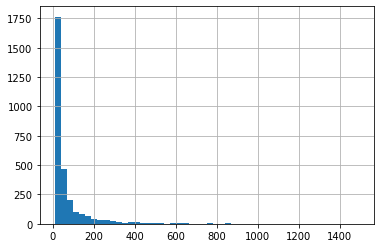

In [77]:
df.groupby('item')['users_per_item'].first().hist(bins=50)

In [51]:
#df.to_csv('/Users/jilljenn/code/vae/data/mangaki/data.csv', index=False)

In [80]:
for field in {'user', 'item'}:
    df[field] = np.unique(df[field], return_inverse=True)[1]
df.nunique(), df.max()

(user              1958
 item              2939
 rating               4
 items_per_user     391
 users_per_item     355
 dtype: int64, user                 1957
 item                 2938
 rating            neutral
 items_per_user       2102
 users_per_item       1495
 dtype: object)

In [83]:
dataset.anonymized.y

array(['favorite', 'neutral', 'like', ..., 'favorite', 'like', 'like'],
      dtype='<U8')

In [84]:
dataset.titles = dict(titles)
dataset.categories = dict(categories)

In [86]:
dataset.save_csv('', suffix='-2020')

In [91]:
dict(titles)

{1: 'Death Note',
 2: 'Code Geass: Hangyaku no Lelouch',
 3: 'Sword Art Online',
 4: 'Naruto',
 5: "L'Attaque des Titans",
 6: 'Bleach',
 7: 'Fullmetal Alchemist: Brotherhood',
 8: 'Fullmetal Alchemist',
 9: 'Elfen Lied',
 10: 'Angel Beats!',
 11: 'Clannad',
 12: 'Toradora!',
 13: 'Code Geass: Hangyaku no Lelouch R2',
 14: 'Soul Eater',
 15: 'Tengen Toppa Gurren Lagann',
 16: 'Steins;Gate',
 17: 'Naruto: Shippuuden',
 18: 'Fairy Tail',
 19: 'The Future Diary',
 20: 'Durarara!!',
 21: 'Highschool of the Dead',
 22: 'Ao no Exorcist',
 23: 'La mélancolie de Haruhi Suzumiya',
 24: 'Bakemonogatari',
 25: 'Neon Genesis Evangelion',
 26: 'Cowboy Bebop',
 27: 'One Piece',
 28: 'Ouran Koukou Host Club',
 29: 'Darker than Black: Kuro no Keiyakusha',
 30: 'Spirited Away',
 31: 'Clannad: After Story',
 32: 'Another',
 33: 'Mahou Shoujo Madoka★Magica',
 34: 'K-On!',
 35: 'Black Butler',
 36: 'Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.',
 37: 'Guilty Crown',
 38: 'Higurashi no Naku Kor

In [95]:
dataset.decode_work[3312]

1

In [97]:
df.nunique()

user              1958
item              2939
rating               4
items_per_user     391
users_per_item     355
dtype: int64

In [101]:
df['decoded_item'] = df['item'].map(dataset.decode_work)
df.sort_values('items_per_user', ascending=False)

,user,item,rating,items_per_user,users_per_item,decoded_item
26102,1650,674,dislike,2102,14,15320
102937,1650,1670,dislike,2102,340,8346
68327,1650,288,dislike,2102,89,18294
102923,1650,1760,like,2102,21,16786
203833,1650,2778,dislike,2102,34,12143
...,...,...,...,...,...,...
122211,979,1988,favorite,10,976,20811
145300,183,863,like,10,861,6620
163844,1488,177,neutral,10,378,6723
233719,1346,2362,like,10,871,5180


In [100]:
df.query('item == 3312')

,user,item,rating,items_per_user,users_per_item,decoded_item


In [108]:
df0 = pd.read_csv('ratings-2020.csv', names=('user', 'item', 'rating'))
df0['items_per_user'] = df0.groupby('user')['item'].transform('count')
df0['users_per_item'] = df0.groupby('item')['user'].transform('count')
df0

,user,item,rating,items_per_user,users_per_item
0,339,1626,favorite,223,8
1,2057,7939,neutral,187,147
2,1382,8120,like,284,62
3,1455,8588,like,114,241
4,223,5575,dislike,114,88
...,...,...,...,...,...
234809,472,4509,dislike,780,29
234810,1926,74,dislike,5001,438
234811,1997,406,favorite,159,17
234812,1747,6798,like,708,81


In [109]:
df0['decoded_item'] = df0['item'].map(dataset.decode_work)
df0.sort_values('users_per_item', ascending=False)

,user,item,rating,items_per_user,users_per_item,decoded_item
166430,1738,3312,favorite,32,1634,1
131102,1260,3312,like,12,1634,1
153194,1991,3312,neutral,173,1634,1
86370,1399,3312,favorite,9,1634,1
34568,1646,3312,like,53,1634,1
...,...,...,...,...,...,...
151651,2199,6959,like,284,1,14097
187731,1763,8790,like,720,1,14026
83223,248,5963,dislike,1853,1,20732
13285,248,7617,dislike,1853,1,15277


In [111]:
df0['item'].nunique()

9174

In [112]:
df0['item']

0         1626
1         7939
2         8120
3         8588
4         5575
          ... 
234809    4509
234810      74
234811     406
234812    6798
234813    4655
Name: item, Length: 234814, dtype: int64

In [119]:
all_work_ids = set(Work.objects.values_list('id', flat=True))
len(all_work_ids)

15500

In [120]:
import os

have_poster = set(int(filename.replace('.jpg', '')) for filename in os.listdir('real_posters'))
len(have_poster)

12489

In [121]:
len(have_poster - all_work_ids)

248

In [122]:
len(all_work_ids - have_poster)

3259

In [123]:
dataset_ids = set(df0['decoded_item'].unique().tolist())
len(dataset_ids)

9174

In [124]:
len(dataset_ids - have_poster)

1831

In [125]:
len(have_poster - dataset_ids)

5146

In [126]:
len(dataset_ids & have_poster)

7343

In [127]:
len(dataset_ids & have_poster) / len(dataset_ids)

0.8004142140832788

In [128]:
dataset.encode_work[1]

3312

In [131]:
for work_id in dataset_ids & have_poster:
    os.system(f'cp real_posters/{work_id}.jpg posters/{dataset.encode_work[work_id]}.jpg')

In [133]:
df0.to_csv('decoder-2020.csv', index=False)